# Homework 1: data analysis and scientific visualisation

#### Deadline: Friday 30 June 2023 (by the end of the day)

#### Credits: 20 points

## Name/s: Gabriel Balarezo

### Statement of author contribution (only needed if you work in pairs)

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec



- You may work individually or in pairs. Please include your name/s in the notebook.



- Within a **single python notebook**, solve the following problems:

### Problem 1. (5 points) Data I/O and analysis: climate time series

This problem consists of reading, displaying, and analysing climate data. The data file for this exercise was downloaded from: https://ourworldindata.org/ and contains the following information:


- Annual $\rm CO_2$ emission per capita (in tons), see file: **co-emissions-per-capita.csv**

https://github.com/wbandabarragan/computational-physics-1/blob/main/assignments/data_sets/co-emissions-per-capita.csv


Write Python functions that: 

(a) Read in the **co-emissions-per-capita.csv** file, and place the data into a pandas dataframe. Inspect the data tables to check how they are organised.


(b) Create 3 new data objects (time series) that contain only the information (rows) for Ecuador, Colombia, and Peru. **Hint:** Use the **data.loc** function to locate the respective rows based on the country name.


(c) Inspect the data, compare the time ranges (in years), and adjust the data series (if necessary) so that each object/series contains information for the same number of years. **Hint:** Use conditionals to select only the overlapping time periods.


(d) Now that all the series cover the same time period in years, calculate the average and standard deviation of the annual $\rm CO_2$ emission per capita (in tons) of these 3 countries. Create and export (in CSV format) a new pandas data frame that contains 6 columns:

- Year

- $\rm CO_2$ emission in Ecuador

- $\rm CO_2$ emission in Colombia

- $\rm CO_2$ emission in Peru

- Average $\rm CO_2$ emission (of these 3 countries)

- Standard deviation of the $\rm CO_2$ emission (of these 3 countries)


(e) Make a labeled, high-quality plot of the annual $\rm CO_2$ emission per capita (in tons) versus time, including the lines for each country, the line for the average with y-error bars equal to the $1\sigma$ standard deviations calculated above. Briefly comment on the results.

In [2]:
# Fist, let's import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyvista as pv
import scipy.optimize as opt
import os
import scipy.constants as const 
import scipy.stats as st

#### (a) 
Read in the **co-emissions-per-capita.csv** file, and place the data into a pandas dataframe. Inspect the data tables to check how they are organised.

In [3]:
# Define the function 

def read_file(file_name):
    """
    This function reads a data file and puts 
    this into a pandas data frame. 
    Input: file_name
    Output: data (pandas dataframe)
    """
    data = pd.read_csv(file_name, sep = ",")
    
    return data

In [4]:
# Let's call the function 
# First we need to define the filename 
file_name = "co-emissions-per-capita.csv"

# call the function
df = read_file(file_name)

In [5]:
# inspect the dataframe
print(df)

            Entity Code  Year  Annual CO2 emissions (per capita)
0      Afghanistan  AFG  1949                             0.0019
1      Afghanistan  AFG  1950                             0.0109
2      Afghanistan  AFG  1951                             0.0117
3      Afghanistan  AFG  1952                             0.0115
4      Afghanistan  AFG  1953                             0.0132
...            ...  ...   ...                                ...
24027     Zimbabwe  ZWE  2016                             0.7653
24028     Zimbabwe  ZWE  2017                             0.6730
24029     Zimbabwe  ZWE  2018                             0.8210
24030     Zimbabwe  ZWE  2019                             0.7476
24031     Zimbabwe  ZWE  2020                             0.7086

[24032 rows x 4 columns]


So, at first glance, we can see that the data is organised by columns. Each column is labeled by a header and it is easy to see what information is stored in each one. We can get the keys as follows:

In [6]:
print(df.keys())

Index(['Entity', 'Code', 'Year', 'Annual CO2 emissions (per capita)'], dtype='object')


#### (b) 
Create 3 new data objects (time series) that contain only the information (rows) for Ecuador,
Colombia, and Peru. Hint: Use the data.loc function to locate the respective rows based on the country name.

In [7]:
# Now we get the data for the three requested countries: Ecuador, Peru and Colombia
# Define the function

def country_data(data, country_name):
    """
    This function gets specific information from 
    a pandas dataframe depending on the country 
    you are interested in.
    """
    new_data = data.loc[data['Entity'] == country_name]
    
    return new_data 

In [8]:
# Call the function 

# For Ecuador 
ecuador_df = country_data(df, "Ecuador")

# For Colombia 
colombia_df = country_data(df, "Colombia")

# For Peru 
peru_df = country_data(df, "Peru")

#### (c) 
Inspect the data, compare the time ranges (in years), and adjust the data series (if necessary) so that each object/series contains information for the same number of years. **Hint:** Use conditionals to select only the overlapping time periods.

In [9]:
# Inspect the obtained data 

print(ecuador_df.shape, colombia_df.shape, peru_df.shape)

#print(ecuador_df)
#print(colombia_df)
#print(peru_df)

(104, 4) (100, 4) (137, 4)


We can notice that the data of the three countries do not have the same dimensions, which means we need to get just the overlaping time periods. 

For this, we first identify the shorter time period:

In [10]:
#print(ecuador_df.min(), ecuador_df.max())
#print(colombia_df.min(), colombia_df.max())
#print(peru_df.min(), peru_df.max()) 

We can notice that the three time periods end at 2020, but they do not start at the same point. The shorter time period startes at 1921, which corresponds to Colombia. So is this time period we will use to adjust the other two time periods. 

In [11]:
# Now, let's get the data for each country
min_year = 1921

# Define the function
new_data = lambda data: data[data["Year"] >= min_year]

# Call the function
ecuador_df2 = new_data(ecuador_df)
colombia_df2 = new_data(colombia_df)
peru_df2 = new_data(peru_df)


#print(ecuador_df2)
#print(colombia_df2)
#print(peru_df2)

#### (d) 
Now that all the series cover the same time period in years, calculate the average and standard deviation of the annual $\rm CO_2$ emission per capita (in tons) of these 3 countries. Create and export (in CSV format) a new pandas data frame that contains 6 columns:

- Year

- $\rm CO_2$ emission in Ecuador

- $\rm CO_2$ emission in Colombia

- $\rm CO_2$ emission in Peru

- Average $\rm CO_2$ emission (of these 3 countries)

- Standard deviation of the $\rm CO_2$ emission (of these 3 countries)

In [12]:
# I will use a function as well 
data_array = lambda data, key:  np.array(data[key])

In [13]:
# First, let's put Year into an np array. Since the years are the same for the three countries, 
# we can choose anyone
year_array = data_array(ecuador_df2, "Year")

#print(year_array)

In [14]:
# Now, let's put into numpy arrays the CO2 emissions for each country.


# Ecuador 
CO2_ecuador = data_array(ecuador_df2, "Annual CO2 emissions (per capita)")

# Colombia
CO2_colombia = data_array(colombia_df2, "Annual CO2 emissions (per capita)")

# Peru 
CO2_peru = data_array(peru_df2, "Annual CO2 emissions (per capita)")

#print(CO2_ecuador)
#print(CO2_colombia)
#print(CO2_peru)

In [15]:
# Let's find the average and standard deviation of the annual  CO2
# emission per capita (in tons) of these 3 countries.

# Define the function
def average(*co2_array):
    """
    This function calculates the average CO2 emissions per capita 
    and  standard deviation given the CO2 emissions per capita of a country.
    Input: co2_array
    Output: mean_co2, stdv
    """
    # Concatenate the input arrays
    new_co2_array = np.array(co2_array)
    
    # Calculate the average along the axis 0 (rows)
    mean_co2 = np.mean(new_co2_array, axis = 0)
    
    # Compute the standard deviation as well
    stdv = np.std(new_co2_array, axis = 0)
    
    return mean_co2, stdv

In [16]:
# Call the function 
mean_co2, stdv = average(CO2_ecuador, CO2_colombia, CO2_peru)

# check the obtained data

#print(mean_co2)
#print(stdv)

In [17]:
# Now, let's create a pandas dataframe with the requested data


new_df = pd.DataFrame({'Year': year_array, 'C02 emission in Ecuador': CO2_ecuador,
                      'C02 emission in Colombia': CO2_colombia, 
                      'CO2 emission in Peru': CO2_peru, 'Average CO2 emission': mean_co2, 
                      'Standard deviation of CO2 emissions': stdv})

#print(new_df)

# Let's put it into a .csv file 
new_df.to_csv('co2_new_df.csv', ",", float_format = '{:.4e}'.format)


#### (e) 
Make a labeled, high-quality plot of the annual $\rm CO_2$ emission per capita (in tons) versus time, including the lines for each country, the line for the average with y-error bars equal to the $1\sigma$ standard deviations calculated above. Briefly comment on the results.

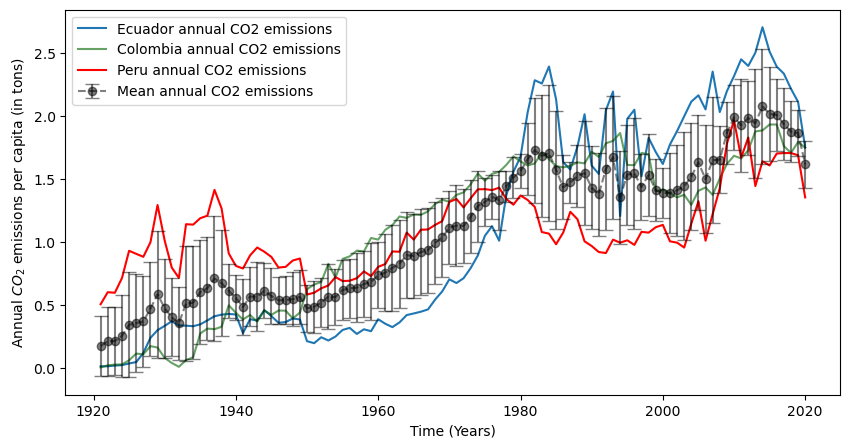

In [20]:
# Plotting 

# Begin env 
plt.figure(figsize= (10, 5))

plt.plot(year_array, CO2_ecuador,color = 'C10', linestyle='-', 
         label = 'Ecuador annual CO2 emissions')
plt.plot(year_array, CO2_colombia, color = 'darkgreen', linestyle='-', 
         label = 'Colombia annual CO2 emissions', alpha = 0.6)
plt.plot(year_array, CO2_peru, color = 'red', linestyle='-',
         label = 'Peru annual CO2 emissions')
#plt.plot(year_array, mean_co2, linestyle = ' ', marker = "+", label = 'Average CO2 emissions')
plt.errorbar(year_array, mean_co2,yerr = stdv, color = 'black', linestyle = '--', fmt = 'o', capsize = 5, 
             label = 'Mean annual CO2 emissions', alpha = 0.5)

plt.ylabel(r'Annual $CO_2$ emissions per capita (in tons)')
plt.xlabel(r'Time (Years)')

plt.legend(loc='best')

plt.show()

We can notice that the error bars are bounded between the trend of the three countries. Also, we can see that the relation between the time and the anual $CO_2$ emission is quasi-monotonic, almost following a linear trend. Finally, we can notice that Peru had the higher $CO_2$ emission at the begining, but then was overcome by Colombia and finally by Ecuador.

### Problem 2. (8 points) Regression, interpolation, $\chi^2$ minimisation: climate time series

Consider the following data files, which contain climate data:

- Annual $\rm CO_2$ emission per capita (in tons), see file: **co-emissions-per-capita.csv**

https://github.com/wbandabarragan/computational-physics-1/blob/main/assignments/data_sets/co-emissions-per-capita.csv

- Sea temperature anomaly with respect to the 1961-1990 (in $\rm ^{\circ}C$), see file: **temperature-anomaly.csv**

https://github.com/wbandabarragan/computational-physics-1/blob/main/assignments/data_sets/temperature-anomaly.csv

Both were downloaded from: https://ourworldindata.org/.

Write Python functions that: 

(a) Read in the **co-emissions-per-capita.csv** file, select the "World" data, and place it into a pandas data frame. **Hint:** Follow the same procedure as for problem 1, but select the rows labeled with "World". Make a labeled figure of $\rm CO_2$ emission per capita (in tons) versus time (in years).


(b) Read in the **temperature-anomaly.csv** file, select the rows corresponding to the global anomaly, i.e., those labeld with "Global". Make a labeled figure of the temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including symmetric y-errors for the temperature anomaly. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.


(c) Check if the data frames created in (a) and (b) cover the same time period in years. If not, use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- World $\rm CO_2$ emission

- Global temperature anomaly

- $2\sigma$ error in temperature anommaly


(d) Make a labeled scatter plot (using markers) of the temperature anomaly (including the $2\sigma$ y-error bars) versus $\rm CO_2$ emission. How monotonic and/or linear is the relation between the two variables?


(e) Make a plot comparing the (linear?) fits to the data using two different methods:

- Carry out a least-mean-square regression to fit a single function (line?) to the whole data set, and report the resulting equation and figure.


- Carry out a $\chi^2$ minimisation (including the y-error bars), and report the resulting equation and figure.


- Briefly comment (in 3-4 lines maximum), are the fitted regressions above representative of the data?


(f) Now, try to improve the fits. The temperature anomaly data are noisy as a result of climate variability.


- Make it smoother by: interpolating it into a finer x-axis and applying a Gaussian filter. Show the comparison in a figure.


- Re-do the analysis in (e), using the smoothed data for the temperature anomaly.


- Is a single line a good model? If not, carry out a piece-wise analysis if necessary and report the new equations and plots.

#### (a)
Read in the **co-emissions-per-capita.csv** file, select the "World" data, and place it into a pandas data frame. **Hint:** Follow the same procedure as for problem 1, but select the rows labeled with "World". Make a labeled figure of $\rm CO_2$ emission per capita (in tons) versus time (in years).

In [18]:
# Call the function 
file_name2 = "co-emissions-per-capita.csv"

df_2 = read_file(file_name2)

In [19]:
# Get only the "World" data 

data_world = df_2.loc[df_2["Entity"] == "World"]

# Put time "Year" and "CO2 emissions" into numpy arrays so we can
# plot them later.

#print(data_world)

In [20]:
# numpy arrays
years_data = np.array(data_world["Year"])
co2_data = np.array(data_world["Annual CO2 emissions (per capita)"])


#print(years_data)

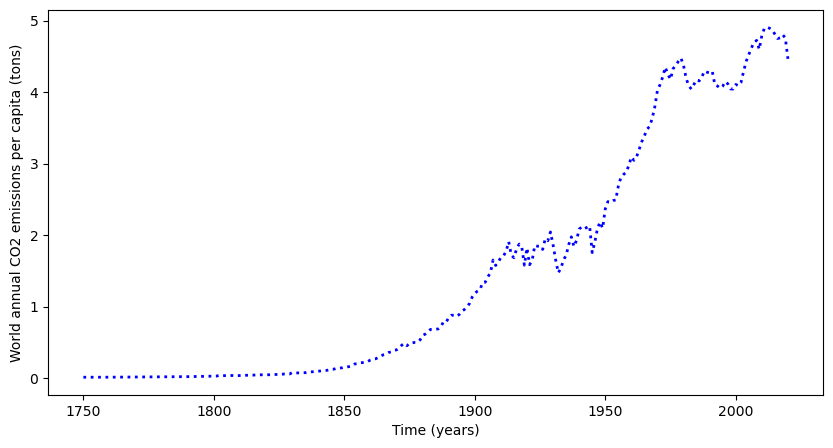

In [21]:
# Plotting 

plt.figure(figsize = (10, 5))

plt.plot(years_data, co2_data, color = 'blue', linestyle = ':', lw = 2)

plt.xlabel("Time (years)")
plt.ylabel("World annual CO2 emissions per capita (tons)")


plt.show()

#### (b)
Read in the **temperature-anomaly.csv** file, select the rows corresponding to the global anomaly, i.e., those labeld with "Global". Make a labeled figure of the temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including symmetric y-errors for the temperature anomaly. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.

In [22]:
# Call the function 

file_name3 = "temperature-anomaly.csv"

df_3 = read_file(file_name3)

In [23]:
# Check the data 

#print(temp_data)

# Get only the "Global" labeled data

gtemp_data = df_3.loc[df_3["Entity"] == "Global"]

#print(gtemp_data)

In [24]:
# Before we proceed to elaborate on the plot, we need to compute the errors
# using the "Upper Bound" and the "Lower Bound" as suggested.

# First, let's place that columns into numpy arrays as well as the median temperature

up_bound = np.array(gtemp_data["Upper bound (95% CI)"])
low_bound = np.array(gtemp_data["Lower bound (95% CI)"])
median_temp = np.array(gtemp_data["Median temperature anomaly from 1961-1990 average"])

#print(up_bound)
#print(low_bound)
#print(median_t)

Now that we have the data of interest into numpy arrays, we proced to calculate the symmetric $2\sigma$ y-errors: 

$$ error = \frac{d_1 + d_2}{2}$$

where $d_1 = \big|Ubound - median\big|$ and $d_2 = \big|median - Lbound\big|$

In [25]:
# Compute d1, d2 and the error

def error(up_bound, low_bound, median):
    """
    This function computes the symmetric 
    2-sigma error for the temperature anomaly
    Input: up_bound, low_bound, median
    Output: error
    """
    
    # Compute d1 and d2
    d1 = abs(median - up_bound)
    d2 = abs(median - low_bound)
    
    # compute the errors
    error = (d1 + d2)/2
    
    return error

In [26]:
# call the function 

error_array = error(up_bound, low_bound, median_temp)

#print(error_array)

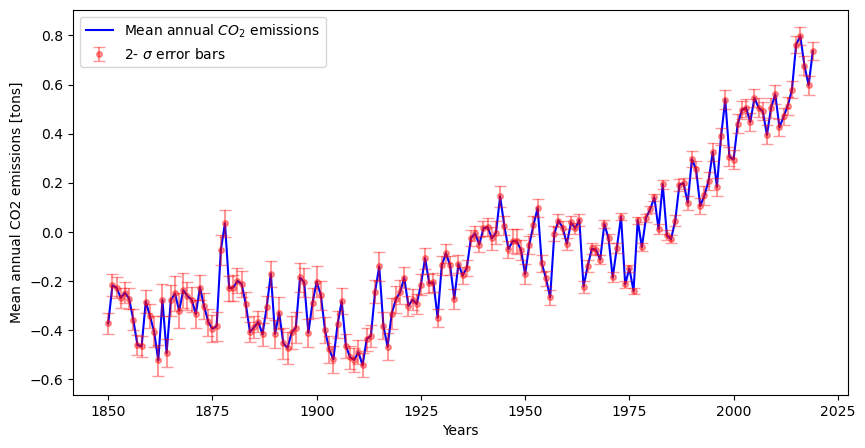

In [27]:
# Plotting 

years_global = np.array(gtemp_data["Year"])

#print(g_years)
# Env

plt.figure(figsize=(10, 5))

plt.plot(years_global, median_temp, linestyle='-', color = "blue", label = r'Mean annual $CO_2$ emissions')

plt.errorbar(years_global, median_temp,yerr = error_array, color = 'red', linestyle = ' ', marker = 'o', 
            markersize = '4', capsize = 4,label = r'2- $\sigma$ error bars', alpha = 0.4)


plt.xlabel('Years')
plt.ylabel('Mean annual CO2 emissions [tons]')
plt.legend()

plt.show()

#### (c) 
Check if the data frames created in (a) and (b) cover the same time period in years. If not, use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- World $\rm CO_2$ emission

- Global temperature anomaly

- $2\sigma$ error in temperature anommaly

In [28]:
# check min and max for the two year arrays 

print(np.min(years_data), np.max(years_data))
print(np.min(years_global), np.max(years_global))

1750 2020
1850 2019


We can notice that the time series do not cover the same range of years. So we need to adjust them.

In [29]:
# Adjust the data 

min1_year = 1850
max1_year = 2019

new_world_df = data_world.loc[data_world["Year"] >= min1_year]

new_world_df = new_world_df.loc[new_world_df["Year"] <= max1_year]

#print(new_world_df)
#print(gtemp_data)


In [30]:
# Create the .csv file

# We need to put all the required data into numpy arrays. We already have Years array,
# Global temperature anomaly, 2-sigma error. 

# Then, let's get co2 emissions data

world_co2_emission = np.array(new_world_df['Annual CO2 emissions (per capita)'])

#print(world_co2_emission)

print(years_global.shape, world_co2_emission.shape, median_temp.shape, error_array.shape)



(170,) (170,) (170,) (170,)


In [31]:
# Now, let's create a pandas dataframe with the requested data


new_df2 = pd.DataFrame({'Year': years_global, 'World CO2 emissions': world_co2_emission,
                      'Global temperature anomaly': median_temp,
                        '2-sigma error in temperature anomaly': error_array})

#print(new_df2)

# Let's put it into a .csv file 

new_df2.to_csv('CO2_temperature.csv', ",", float_format = '{:.4e}'.format)

#### (d) 
Make a labeled scatter plot (using markers) of the temperature anomaly (including the $2\sigma$ y-error bars) versus $\rm CO_2$ emission. How monotonic and/or linear is the relation between the two variables?

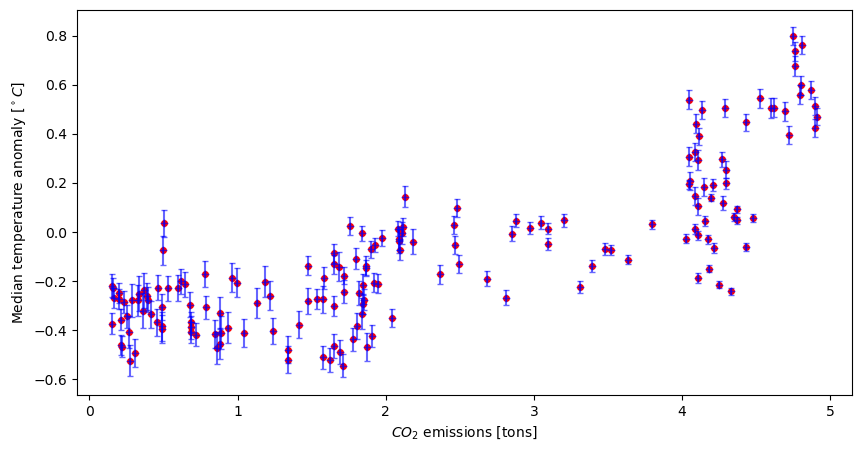

In [32]:
# We could import the data file we created earlier, but since we already 
# have the arrays of that data file, we will use them.

#Env 

plt.figure(figsize=(10, 5))

#plt.plot(world_co2_emission, median_temp, linestyle=':', color='red')
plt.plot(world_co2_emission, median_temp, linestyle='', color='red', marker = 'o', markersize = 4)
plt.errorbar(world_co2_emission, median_temp, yerr = error_array, linestyle = ' ',
            marker = "+", capsize = 2, color = "blue", alpha = 0.6)

plt.xlabel(r"$CO_2$ emissions [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

In [33]:
# To see how monotonic and linear is the relation, we must compute the following coeficients

# Let's calculate these coefficients

# 1. Spearman coeffiecient
sp = st.spearmanr(world_co2_emission, median_temp)

# 2. Pearson coefficient
pe = st.pearsonr(world_co2_emission, median_temp)

print("Spearman:\n", sp)
print("Pearson:\n", pe)

Spearman:
 SignificanceResult(statistic=0.7980445762483592, pvalue=8.508817495111514e-39)
Pearson:
 PearsonRResult(statistic=0.8038965800282324, pvalue=9.388213186058482e-40)


Based on this results,  I can say that the relation is monotonic, but not completely linear. This could be because, as we will see later, we may need more than one line to fit this data, because of the anomaly. 

#### (e) 
Make a plot comparing the (linear?) fits to the data using two different methods:

- Carry out a least-mean-square regression to fit a single function (line?) to the whole data set, and report the resulting equation and figure.


- Carry out a $\chi^2$ minimisation (including the y-error bars), and report the resulting equation and figure.


- Briefly comment (in 3-4 lines maximum), are the fitted regressions above representative of the data?

In [34]:
# We can see that the data is not sorted, this will be a problem when we attempt to perform a fitting because 
# algorithms can not handle with unsorted data.

# Get the indices of the data points in the x-axis in order to arrange them in ascending order.
indices_sort = np.argsort(world_co2_emission)

# Use the above indices to sort the following data.
sorted_x = world_co2_emission[indices_sort]
sorted_y = median_temp[indices_sort]
sorted_errors = error_array[indices_sort]

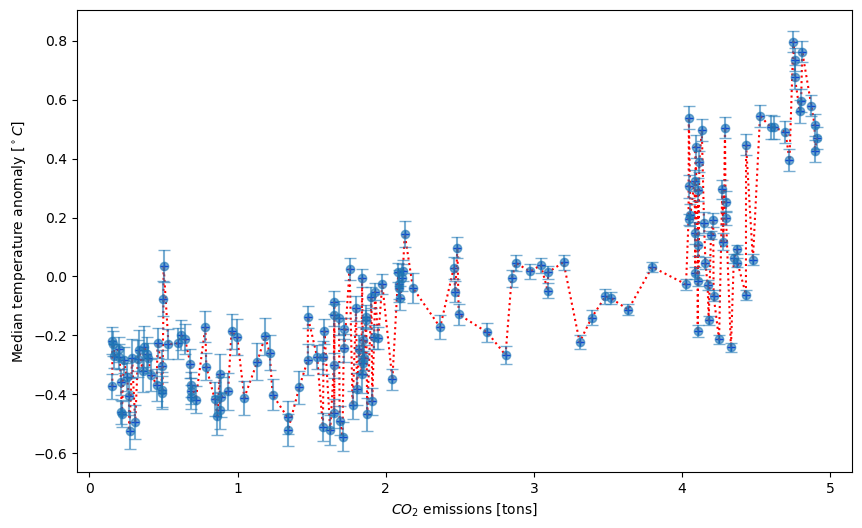

In [35]:
# Plot sorted data.
#Env 

plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = '+')
plt.plot(sorted_x, sorted_y, linestyle=':', color='red')
plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
           fmt = 'o', alpha = 0.6, capsize = 4)

plt.xlabel(r"$CO_2$ emissions [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

#### Least-mean-square regression

In [36]:
# Define the function to fit the data

def fit_model1(x_values, m, b):
    """
    Function to define model to fit the the data.
    Input: x_values, m, b 
    Output: fitted model
    """
    y_values = m * x_values + b
    
    return y_values

In [37]:
# Perform regression
coef, cova = opt.curve_fit(fit_model1, sorted_x, sorted_y)

print(coef)

[ 0.15859006 -0.45188365]


In [38]:
# Compute the mean_t using the fitted parameters 

fitted_mean_t = fit_model1(sorted_x, *coef)

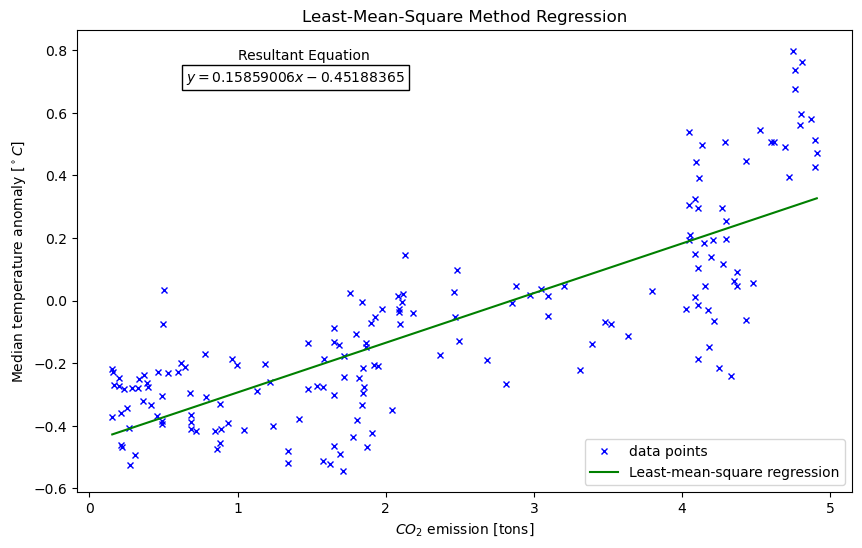

In [39]:
# Plot sorted data.
#Env 

plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = 'x', markersize = 4, label = 'data points')
plt.plot(sorted_x, fitted_mean_t, linestyle='-', color='green', label = 'Least-mean-square regression')
#plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
 #          marker = "+", color = "red", alpha = 0.6)

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.77, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.7, r"$y = 0.15859006 x  -0.45188365$", fontsize=10, color='black', bbox=bbox_props)



plt.title('Least-Mean-Square Method Regression')
plt.legend(loc = 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

#### $\chi^2$ minimisation (including the y-error bars)

In [40]:
# Define chi^2 function

def chi_sqr_function(params):
    """
    This function allows us to return the chi_sqr statistic.
    It compares our experimental data with a proposed model.
    Input:  params = [m, b]
    Output: chi_sqr statistic
    """
    m, b = params  # Unpack the parameters
    model = m * sorted_x + b
    chisqr = np.sum((sorted_y - model) ** 2 / sorted_errors ** 2)
    return chisqr

 
# Initial guess for parameters for m and b
initial_params = [0, 0]

# Minimize the chi-square function
result = opt.minimize(chi_sqr_function, initial_params)

# Get the optimized parameters
optimized_params = result.x
print("Optimized Parameters:", optimized_params)


Optimized Parameters: [ 0.11817329 -0.40429985]


In [41]:
fitted_mean_t2 = fit_model1(sorted_x, *optimized_params)

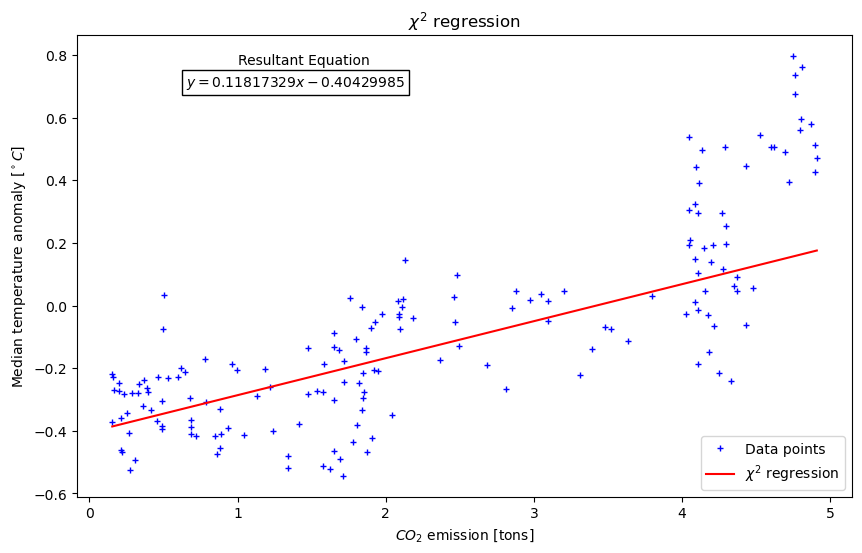

In [42]:
# Plot sorted data.
#Env 

plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = "Data points")
plt.plot(sorted_x, fitted_mean_t2, linestyle='-', color='red', label = r'$\chi^2$ regression')

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.77, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.7, r"$y = 0.11817329 x  -0.40429985$", fontsize=10, color='black', bbox=bbox_props)

plt.title(r"$\chi^2$ regression")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

####  Plotting the results obtained from both regression methods 

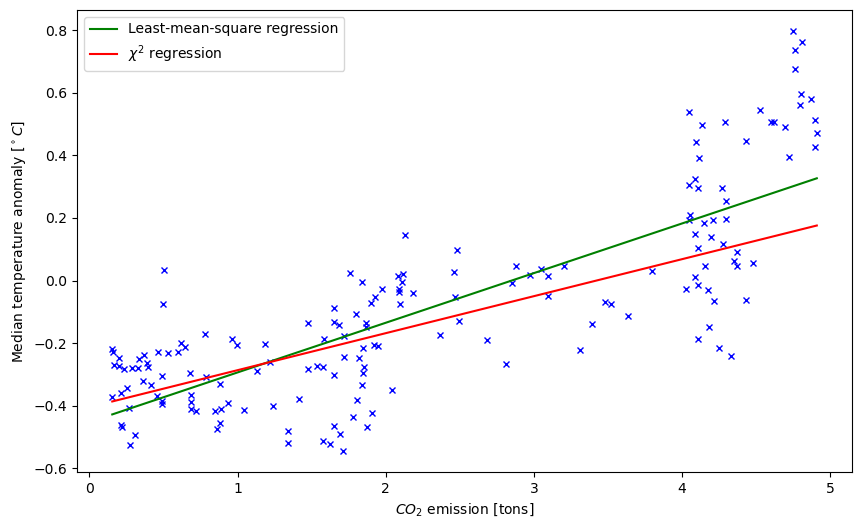

In [43]:
# Plot sorted data.
#Env 

plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = 'x', markersize = 4)
plt.plot(sorted_x, fitted_mean_t, linestyle='-', color='green', label = "Least-mean-square regression")
plt.plot(sorted_x, fitted_mean_t2, linestyle='-', color='red', label = r'$\chi^2$ regression')

#plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
 #          marker = "+", color = "red", alpha = 0.6)
    
plt.legend(loc='best')

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

After carrying out the regression,  I can conclude that the fitted lines are not very representative of the data. This is because of the fact that the data does not follow a only trend, but may have 2 or more trends. 


#### (f) 
Now, try to improve the fits. The temperature anomaly data are noisy as a result of climate variability.


- Make it smoother by: interpolating it into a finer x-axis and applying a Gaussian filter. Show the comparison in a figure.


- Re-do the analysis in (e), using the smoothed data for the temperature anomaly.


- Is a single line a good model? If not, carry out a piece-wise analysis if necessary and report the new equations and plots.

####  Interpolation 

In [44]:
# Python library for interpolating

import scipy.interpolate as interp

# I used this instead of the imported before since there are repeated x-values, and the function cannot be used. 

from scipy.interpolate import UnivariateSpline

In [45]:
# I will perform the interpolation of the temperature anomaly, the lower and upper bounds. 
# So I need to sort them as well 

sorted_up_bound = up_bound[indices_sort]
sorted_low_bound = low_bound[indices_sort]

In [46]:
# Interpolate the temperature anomaly, and its upper and lower bounds

f_cubic = UnivariateSpline(sorted_x, sorted_y, k = 3, s = 0.5)
up_bound_interp = UnivariateSpline(sorted_x, sorted_up_bound, k = 3, s = 0.5)
low_bound_interp = UnivariateSpline(sorted_x, sorted_low_bound, k = 3, s = 0.5)

# Create a new x-axis
x_new = np.linspace(sorted_x.min(), sorted_x.max(), 200)


# Evaluate 
temp_new = f_cubic(x_new)
up_bound_new = up_bound_interp(x_new)
low_bound_new = low_bound_interp(x_new)


print(temp_new.shape)
print(up_bound_new.shape)
print(low_bound_new.shape)

(200,)
(200,)
(200,)


In [47]:
# Apply the Gaussian Filter 

# Import the library 
from scipy.ndimage import gaussian_filter

smooth_temp = gaussian_filter(temp_new, sigma = 2)
smooth_up_bound = gaussian_filter(up_bound_new, sigma = 2)
smooth_low_bound = gaussian_filter(low_bound_new, sigma = 2)


print(smooth_temp.shape)
print(smooth_up_bound.shape)
print(smooth_low_bound.shape)

(200,)
(200,)
(200,)


In [48]:
# compute the new errors array

error_array2 = error(smooth_up_bound, smooth_low_bound, smooth_temp)

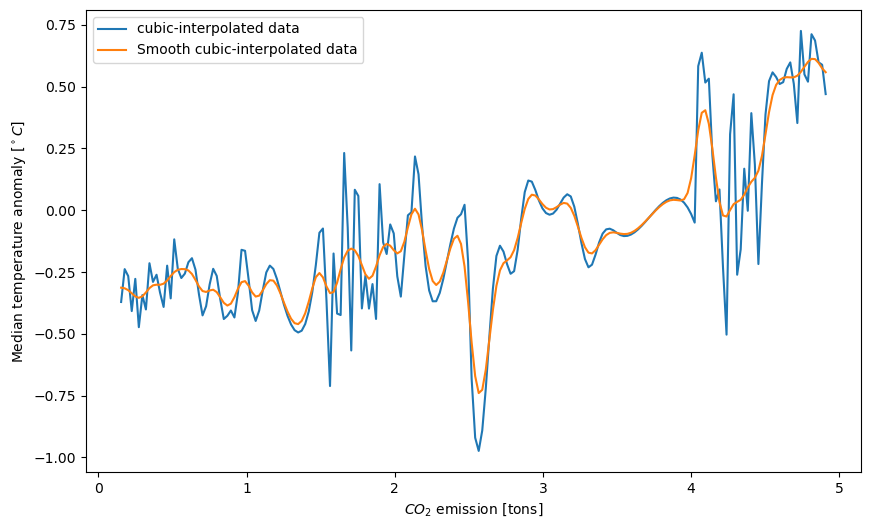

In [49]:


# Plot sorted data.
# Env 

plt.figure(figsize=(10, 6))
plt.plot(x_new, temp_new, label = 'cubic-interpolated data')

plt.plot(x_new, smooth_temp, label = 'Smooth cubic-interpolated data')


plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.legend(loc='best')

plt.show()

####  New Least-Mean-Squares  Regression 

In [50]:
# With the smoothed data, let's re-do the regression 

# Perform regression
coef, cova = opt.curve_fit(fit_model1, x_new, smooth_temp)

# Compute the mean_t using the fitted parameters 
fitted_mean_t3 = fit_model1(x_new, *coef)

print(coef[0], coef[1])

0.15764628529399055 -0.5050376543612737


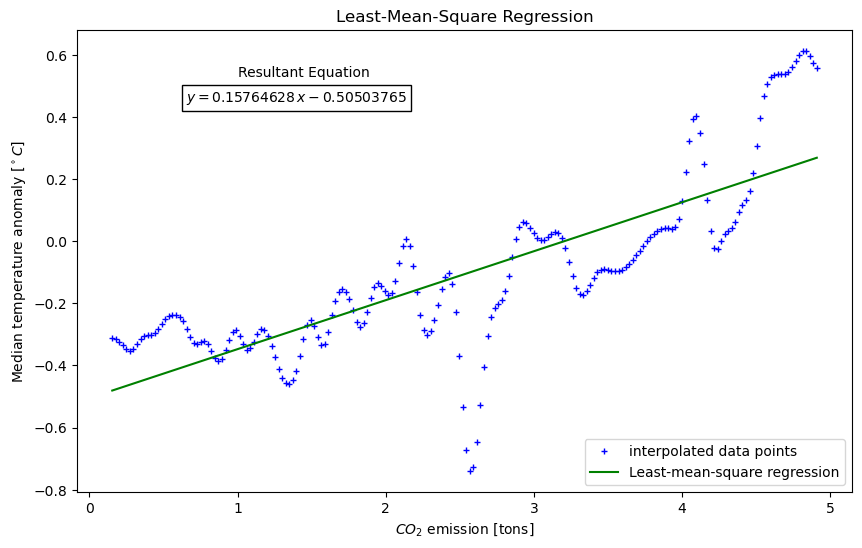

In [51]:
# Plot sorted data.
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_new, smooth_temp, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = 'interpolated data points')
plt.plot(x_new, fitted_mean_t3, linestyle='-', color='green', label = 'Least-mean-square regression')
#plt.plot(sorted_x, fitted_mean_t, linestyle='-', color='green', label = 'Least-mean-square regression')


bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.53, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.45, r"$y = 0.15764628\,x -0.50503765$", fontsize=10, color='black', bbox=bbox_props)


plt.title('Least-Mean-Square Regression')
plt.legend(loc=4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

#### New chi^2 regression

In [52]:
# Define chi^2 function

def chi_sqr_function2(params):
    """
    This function allows us to return the chi_sqr statistic.
    It compares our experimental data with a proposed model.
    Input:  params = [m, b]
    Output: chi_sqr statistic
    """
    m, b = params  # Unpack the parameters
    model = m * x_new + b
    chisqr = np.sum((smooth_temp - model) ** 2 / error_array2 ** 2)
    return chisqr

 
# Initial guess for parameters for m and b
initial_params2 = [1, 1]

# Minimize the chi-square function
result2 = opt.minimize(chi_sqr_function2, initial_params2)

# Get the optimized parameters
optimized_params2 = result2.x
print("Optimized Parameters:", optimized_params2)

Optimized Parameters: [ 0.13724182 -0.49027403]


In [53]:
fitted_mean_t4 = fit_model1(x_new, *optimized_params2)

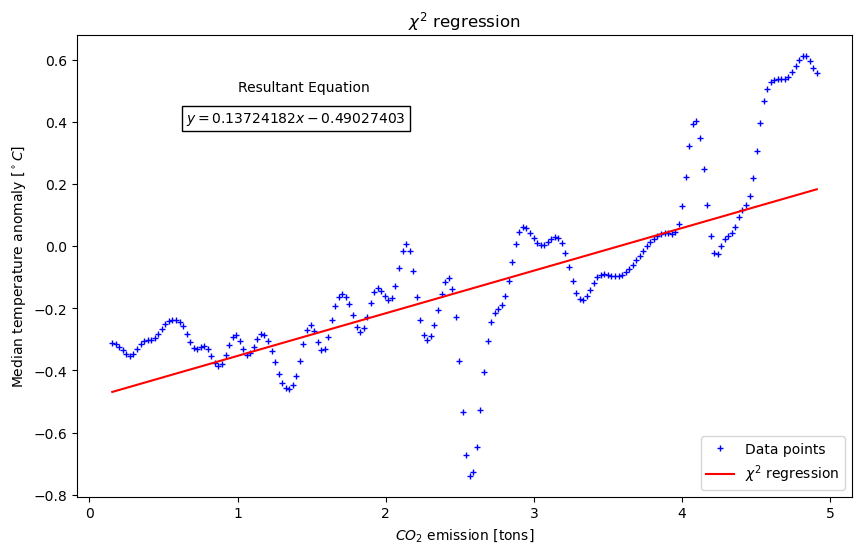

In [54]:
# Plotting
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_new, smooth_temp, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_new, fitted_mean_t4, linestyle='-', color='red', label = r'$\chi^2$ regression')


bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.5, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.4, r"$y = 0.13724182 x  -0.49027403$", fontsize=10, color='black', bbox=bbox_props)

plt.title(r"$\chi^2$ regression")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

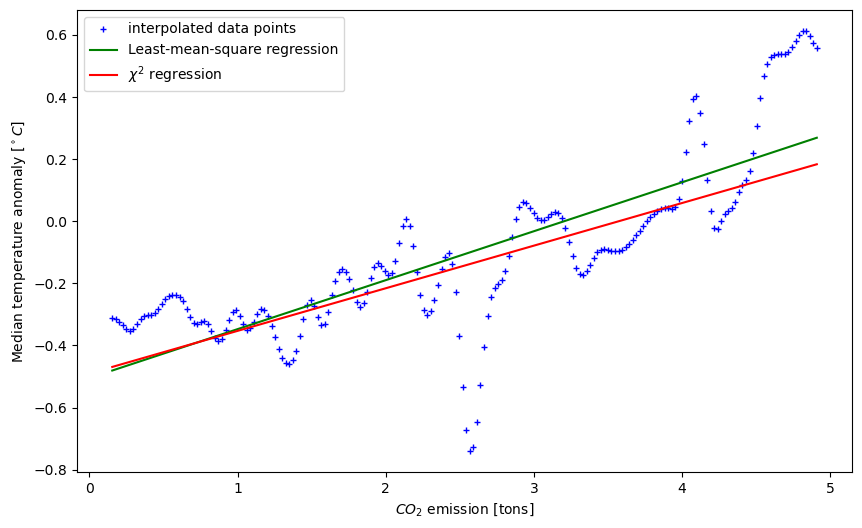

In [55]:
# Plotting the tho new results of the analysis

# Plot sorted data.
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_new, smooth_temp, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = 'interpolated data points')
plt.plot(x_new, fitted_mean_t3, linestyle='-', color='green', label = 'Least-mean-square regression')
plt.plot(x_new, fitted_mean_t4, linestyle='-', color='red', label = r'$\chi^2$ regression')

#plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
 #          marker = "+", color = "red", alpha = 0.6)
    
plt.legend(loc='best')

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

We can notice that just 1 line is not the more appropiate method to fit the data. Because of that, I am going to divide the data set into two datasets. Then, I will carry out a regresion for each one. 

In [56]:
# Using the interpolated data, let's divide them into two datasets
# I will take all the data points in the x-axis that are less or equal than 2.5

x_1 = x_new[x_new <= 2.5]
x_2 = x_new[x_new > 2.5]

print(x_1.shape, x_2.shape)

(99,) (101,)


In [57]:
# Now, let's divide also the y-axis values and the errors as well

y_1 = []
y_2 = []
error_1 = []
error_2 = []

# Loop

for i in range(0, len(x_1)):
    y_1.append(smooth_temp[i])
    error_1.append(error_array2[i])
for i in range(99, len(x_new)):
    y_2.append(smooth_temp[i])
    error_2.append(error_array2[i])
    

y_1 = np.array(y_1)
y_2 = np.array(y_2)

error_1 = np.array(error_1)
error_2 = np.array(error_2)

print(y_1.shape, y_2.shape, error_1.shape, error_2.shape)


(99,) (101,) (99,) (101,)


#### Carry out the regression 

In [58]:
# Define chi^2 function

def chi_sqr_function3(params):
    """
    This function allows us to return the chi_sqr statistic.
    It compares our experimental data with a proposed model.
    Input:  params = [m, b]
    Output: chi_sqr statistic
    """
    m, b = params  # Unpack the parameters
    model = m * x_1 + b
    chisqr = np.sum((y_1 - model) ** 2 / error_1 ** 2)
    return chisqr

 
# Initial guess for parameters for m and b
initial_params3 = [1, 1]

# Minimize the chi-square function
result3 = opt.minimize(chi_sqr_function3, initial_params3)

# Get the optimized parameters
optimized_params3 = result3.x
print("Optimized Parameters:", optimized_params3)

Optimized Parameters: [ 0.10877667 -0.39316447]


In [59]:
fitted_mean_t5 = fit_model1(x_1, *optimized_params3)

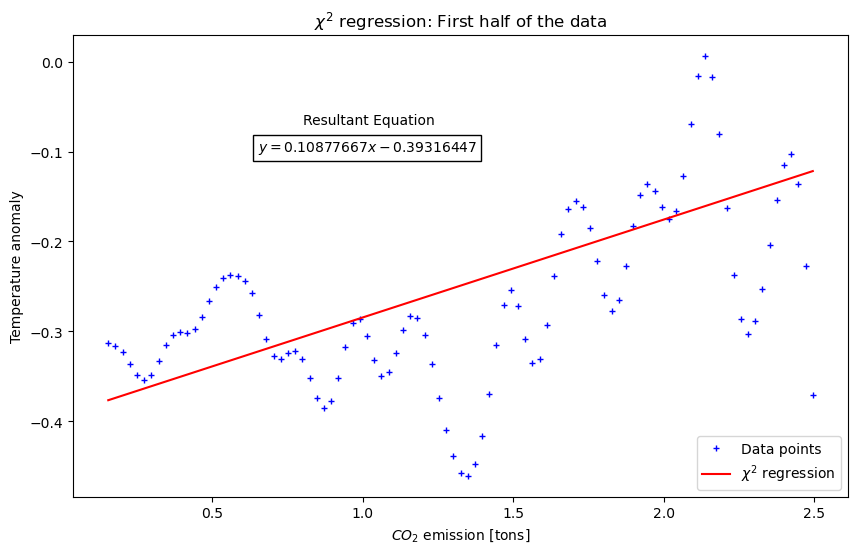

In [60]:
# Plotting
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_1, y_1, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_1, fitted_mean_t5, linestyle='-', color='red', label = r'$\chi^2$ regression')


bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(0.8, -0.07, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, -0.1,r"$y =0.10877667 x  -0.39316447$", fontsize=10, color='black', bbox=bbox_props)

plt.title(r"$\chi^2$ regression: First half of the data")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Temperature anomaly")

plt.show()

In [61]:
# Using the chi^2 method (with sigmas):

coef5, cova5 = opt.curve_fit(fit_model1, x_2,\
                           y_2, sigma = error_2)

print("Best-fit parameters", coef5)

Best-fit parameters [ 0.29064285 -1.06852677]


In [62]:
fitted_mean_t6 = fit_model1(x_2, *coef5)

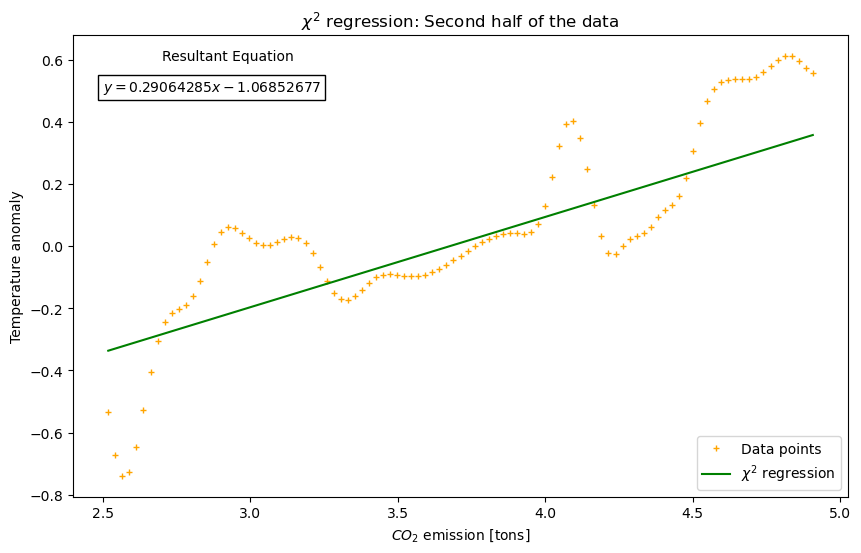

In [63]:
# Plotting
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_2, y_2, linestyle=' ', color = 'orange', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_2, fitted_mean_t6, linestyle='-', color='green', label = r'$\chi^2$ regression')


bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(2.7, 0.6, "Resultant Equation", fontsize=10, color='black')
plt.text(2.5, 0.5,r"$y =0.29064285 x -1.06852677$", fontsize=10, color='black', bbox=bbox_props)

plt.title(r"$\chi^2$ regression: Second half of the data")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Temperature anomaly")

plt.show()

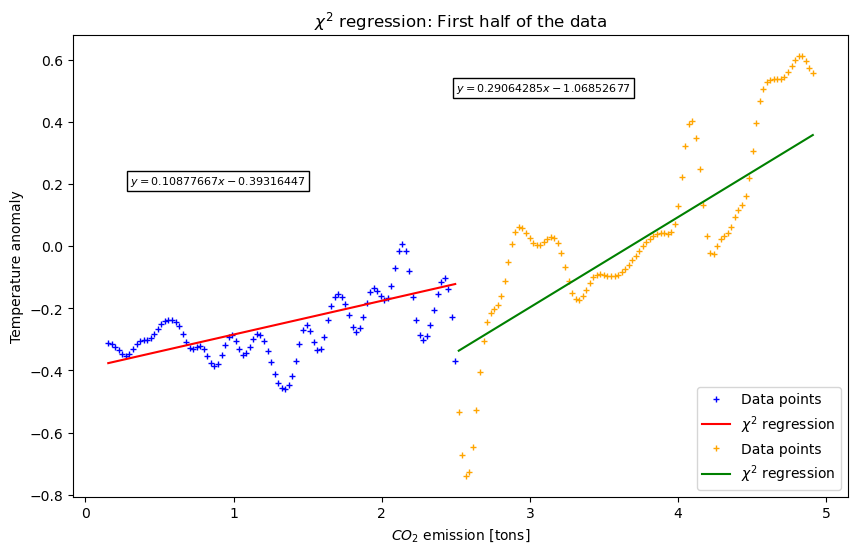

In [64]:
# Plotting
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_1, y_1, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_1, fitted_mean_t5, linestyle='-', color='red', label = r'$\chi^2$ regression')


plt.plot(x_2, y_2, linestyle=' ', color = 'orange', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_2, fitted_mean_t6, linestyle='-', color='green', label = r'$\chi^2$ regression')

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(0.3, 0.2,r"$y =0.10877667 x  -0.39316447$", fontsize=8, color='black', bbox=bbox_props)

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(2.5, 0.5,r"$y =0.29064285 x -1.06852677$", fontsize = 8, color='black', bbox=bbox_props)


plt.title(r"$\chi^2$ regression: First half of the data")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Temperature anomaly")

plt.show()

We can see that with two lines we can get a more accurrate fitting. Since the Temperature anomaly at a point started to increase faster than previus years, the trend cannot be unique. 

### Problem 3. (7 points) Data analysis and visualisation (Orszag-Tang MHD vortex)

The **Orszag-Tang vortex** system describes a doubly periodic ideal gas configuration leading to 2D supersonic magnetohydrodynamical (MHD) turbulence. Although an analytical solution is not known, its simple and reproducible set of initial conditions has made it very appealing for the comparison of MHD numerical solvers. The computational domain is a **periodic box** with dimensions: $[0,2\pi]^2$.

In code units, the initial conditions are given by:

$
\vec{v}_{code} = \left(-\sin y,\, \sin x\right) \,,\qquad
\vec{B}_{code} = \left(-\sin y,\, \sin 2x\right) \,,\qquad
\rho_{code} = 25/9\,,\qquad
p_{code}    = 5/3,
$

and the numerical simulation produces $61$ VTK files stored in:

- the **Orszag-Tang-MHD** folder: 

https://github.com/wbandabarragan/computational-physics-1/blob/main/assignments/data_sets/Orszag_Tang-MHD.zip

which also contains the following descriptor files:

- a **units.out** file that contains the CGS normalisation values.
- a **vtk.out** file whose second column contains the times in code units.
- a **grid.out** file that contains information on the grid structure.

You can use VisIt to inspect the data. The written fields are: 

- density (rho)
- thermal pressure (prs)
- velocity_x (vx1)
- velocity_y (vx2)
- magnetic_field_x (Bx1)
- magnetic_field_y (Bx2)

**Reference paper:**
https://arxiv.org/pdf/1001.2832.pdf

"High-order conservative finite difference GLM-MHD schemes for cell-centered MHD", Mignone, Tzeferacos & Bodo, JCP (2010) 229, 5896.

Carry out the following tasks:

(a) Write a set of Python functions that reads in the simulation data, normalises the data fields to CGS units (using information from units.out), interpolates them into a mesh, and sequentially prints the following figures into a folder called "output_maps" for all times:

- Density, $\rho$

- Thermal pressure, $p$, with superimposed velocity, $\vec v$

- Kinetic energy density, $E_k = \frac{1}{2}\rho\,v^2$

- Magnetic energy density, $E_m = \frac{1}{2}\frac{B^2}{\,\mu_0}$, where $\mu_0\equiv$ magnetic permeability of free space

Add time-stamps in CGS units to the above maps (using information from vkt.out, as in the examples developed in class).

(b) Create a set of Python functions that loops over all the VTK simulation files and returns histograms of the density field, $\rho$, into a folder called "output_histograms". Based on the maps from (a) and the time evolution of the density histograms computed in (b), briefly explain what happens in this simulation from a physical point of view.

(c) Create a set of Python functions that loops over all the VTK simulation files, computes the following quantities in CGS units for each time:

- the average gas temperature, $\overline T$, (**Hint:** the temperature in each grid cell can be calculated using the equation of state for ideal gases, i.e., $p=\frac{\rho k_BT}{\mu m_u}$, where $k_B$ is the Boltzmann constant, $m_u$ is the atomic mass unit, and $\mu=0.6$ is the mean particle mass in the gas.)

- the average kinetic energy density, $\overline E_k$,

- the average magnetic energy density, $\overline E_m$, and

- the mass-weighted average ($\langle ... \rangle$) velocity dispersion, $\sigma_v = \sqrt{\langle v^2 \rangle - \langle v \rangle^2}$,


and returns:

- a CSV file with 5 columns, time on the first column, and the above quantities in the next ones. The CSV file should be saved into a folder called "output_data".

(d) Create a Python function that reads in the CSV file created in (c) and returns and saves high-quality labeled figures of each of the above-computed quantities versus time, into a folder called "output_analysis". Does the flow reach steady state?


(e) Create a Python function that returns movies showing the time evolution of the kinetic energy density and the magnetic energy density maps computed in (a) and their average values calculated in (c). The movies should be saved into the folder called "output_energies". According to the results, which energy density in dominant?

#### (a) Write a set of Python functions that reads in the simulation data, normalises the data fields to CGS units (using information from units.out), interpolates them into a mesh, and sequentially prints the following figures into a folder called "output_maps" for all times:

- Density, $\rho$

- Thermal pressure, $p$, with superimposed velocity, $\vec v$

- Kinetic energy density, $E_k = \frac{1}{2}\rho\,v^2$

- Magnetic energy density, $E_m = \frac{1}{2}\frac{B^2}{\,\mu_0}$, where $\mu_0\equiv$ magnetic permeability of free space

Add time-stamps in CGS units to the above maps (using information from vkt.out, as in the examples developed in class).

In [65]:
# Define a function to read the units.out file 

def units(directory, file_name):
    """
    This function reads the units.out file 
    and returns the normalisation values 
    stored on it.
    Input: directory, file_name
    Output: df_units, rho_0, v_0, L_0
    """
    
    # Put the data into a pandas dataframe
    df_units = pd.read_csv(directory + file_name)
    
    # read the units and put them into numpy arrays
    rho_0 = np.array(df_units.loc[df_units["variable"] == 'rho_0']['normalisation'])
    v_0 = np.array(df_units.loc[df_units["variable"] == 'v_0']['normalisation'])
    L_0 = np.array(df_units.loc[df_units["variable"] == 'L_0']['normalisation'])

    return df_units, rho_0, v_0, L_0


In [66]:
# Set directory and file name 
directory = "./Orszag_Tang-MHD/"
file_name = "units.out"

In [67]:
# Call the function 
df, rho_0, v_0, L_0 = units(directory, file_name)

# check

print(df)
print(rho_0)
#print(v_0)

  variable  normalisation   units
0    rho_0   1.673000e-24  g/cm^3
1      v_0   1.000000e+05    cm/s
2      L_0   1.496000e+13      cm
[1.673e-24]


In [68]:
# Let's compute t_0 
t_0 = L_0/v_0

# Compute B_0
B_0 = v_0 * np.sqrt(4 * np.pi * rho_0)

# Compute p_0
prs_0 = rho_0 * v_0**2


# Now. let's get the times from the vtk.out file
file_name2 = "vtk.out"

time_data = pd.read_csv(directory + file_name2, sep='\s+', header=None)

time_code = time_data.iloc[:,1]

# Get t_0 in CGS units 
time_cgs = time_code*t_0

#print(time_cgs)
print(prs_0)
print(rho_0)
print(v_0)
#print(len(time_cgs))

[1.673e-14]
[1.673e-24]
[100000.]


Till here, there is no problem. Now, I'm thinking about creating a function that reads any file, then this function will normalise all this columns. After that, this function will reshape the flattend arrays into 2D arrays. Finally this function will also perform the calculation of some quantities we need for this task. 

I will use the function in some for-loops to plot the requested data.

In [69]:
# Let's open 1 file in order to see the way data is organised

# Get the data into a mesh
mesh = pv.read(directory+"/data.0010.vtk")

#print(mesh)
print(mesh.array_names)

['rho', 'vx1', 'vx2', 'Bx1', 'Bx2', 'prs']


In [70]:
# Fist, let's define de function 

def io_simulation(filename):
    """
    I/O function: This function reads a vtk file, and returns normalised 
    2D columns in cgs units.
    Input: filename
    Output: rho_cgs2D, vx1_cgs2D, vx2_cgs2D, Bx1_cgs2D, Bx2_cgs2D, prs_cgs2D
    """
    
    # Opening the mesh
    mesh = pv.read(filename)
    
    # Getting the data arrays
    rho = pv.get_array(mesh, "rho", preference = 'cell') #density in code units
    vx1 = pv.get_array(mesh, "vx1", preference = 'cell') #vx in code units
    vx2 = pv.get_array(mesh, "vx2", preference = 'cell') #vy in code units    
    Bx1 = pv.get_array(mesh, "Bx1", preference = "cell") #Bx in code units 
    Bx2 = pv.get_array(mesh, "Bx2", preference = "cell") #By in code units 
    prs = pv.get_array(mesh, "rho", preference = "cell") # thermal pressure in code units
    
    # Convert the arrays to 2D
    rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx2_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    prs_2D = prs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    
    
    # Convert arrays to CGS units
    rho_cgs2D = np.array(rho_2D * rho_0)
    vx1_cgs2D = np.array(vx1_2D * v_0)
    vx2_cgs2D = np.array(vx2_2D * v_0)
    Bx1_cgs2D = np.array(Bx1_2D * B_0)
    Bx2_cgs2D = np.array(Bx2_2D * B_0)
    prs_cgs2D = np.array(prs_2D * prs_0)

    return rho_cgs2D, vx1_cgs2D, vx2_cgs2D, Bx1_cgs2D, Bx2_cgs2D, prs_cgs2D

In [71]:
# Create the directory
if os.path.isdir("./output_maps"):
    print("Directory already exists.")
else:
    print("Directory is being created.")
    os.mkdir("./output_maps")

Directory already exists.


Now, let's create a loop which will allow us to plot each one of the quantities below for each time:

- Density, $\rho$

- Thermal pressure, $p$, with superimposed velocity, $\vec v$

- Kinetic energy density, $E_k = \frac{1}{2}\rho\,v^2$

- Magnetic energy density, $E_m = \frac{1}{2}\frac{B^2}{\,\mu_0}$, where $\mu_0\equiv$ magnetic permeability of free space

In [72]:
# Create coordinate vectors
x = np.linspace(mesh.bounds[0], mesh.bounds[1], \
               mesh.dimensions[0] - 1) * L_0
y = np.linspace(mesh.bounds[2], mesh.bounds[3], \
               mesh.dimensions[0] - 1) * L_0

# Generate a grid
x_2D, y_2D = np.meshgrid(x, y)

# Maps directory 
map_directory = "./output_maps/"



In [73]:
# DENSITY PLOT (rho)

for i in range(0,len(time_cgs)):
    
    # Define the filename 
    filename = directory + "data.0{:03d}.vtk".format(i) 
    
    # Call the function
    rho_cgs2D, vx1_cgs2D, vx2_cgs2D, Bx1_cgs2D, Bx2_cgs2D, prs_cgs2D = io_simulation(filename)
    
    # DENSITY PLOT (rho)
    plt.figure(figsize = (6, 5))

    z = plt.pcolor(x_2D, y_2D, rho_cgs2D, cmap = "viridis", vmin = 0, vmax = 8e-24)

    plt.colorbar(z)
    plt.title(f"time: {time_cgs[i]} [s] ")
    
    # Save the figures 
    plt.savefig(map_directory + "density_plot{:03d}.png".format(i))
    plt.close()

In [74]:
# THERMAL PRESSURE (p) WITH SUPERIMPOSED VELOCITY PLOTS  

for i in range(0,len(time_cgs)):
    
    # Define the filename 
    filename = directory + "data.0{:03d}.vtk".format(i) 
    
    # Call the function
    rho_cgs2D, vx1_cgs2D, vx2_cgs2D, Bx1_cgs2D, Bx2_cgs2D, prs_cgs2D = io_simulation(filename)
    
    # THERMAL PRESSURE (p) WITH SUPERIMPOSED VELOCITY PLOTS  
    
    # compute the modulus of the velocity
    modulus_velocity = np.sqrt(vx1_cgs2D**2 + vx2_cgs2D**2)
    
    # Plot
    plt.figure(figsize=(10,9))

    
    z1 = plt.pcolor(x_2D, y_2D, prs_cgs2D, cmap = "Blues", vmin = 0, vmax = 1e-13)
    z2 = plt.quiver(x_2D, y_2D, vx1_cgs2D , vx2_cgs2D, modulus_velocity, color = "black", clim = (0, 3))
    
    
    
    CB1 = plt.colorbar(z1)
    CB2 = plt.colorbar(z2)
    
    CB1.set_label('density')
    CB2.set_label('velocity')
    
    plt.title(f"time: {time_cgs[i]} [s] ")
        
    # Save the figures 
    plt.savefig(map_directory + "thermal_pressure_velocity{:03d}.png".format(i))
    plt.close()

In [75]:
# KINETIC ENERGY DENSITY PLOTS

for i in range(0,len(time_cgs)):
    
    # Define the filename 
    filename = directory + "data.0{:03d}.vtk".format(i) 
    
    # Call the function
    rho_cgs2D, vx1_cgs2D, vx2_cgs2D, Bx1_cgs2D, Bx2_cgs2D, prs_cgs2D = io_simulation(filename)
    
        
    # KINETIC ENERGY DENSITY PLOTS
    
    # compute the modulus of the velocity
    modulus_velocity = np.sqrt(vx1_cgs2D**2 + vx2_cgs2D**2)
    
    # Compute the kinetic energy density
    E_k2D = (1/2)* rho_cgs2D * modulus_velocity**2 
    
    # Plot 
    plt.figure(figsize=(6, 5))
    
    z3 = plt.pcolor(x_2D, y_2D, E_k2D, cmap = "viridis", vmin = 0, vmax = 1e-13)
    
    plt.colorbar(z3)
    plt.title(f"time: {time_cgs[i]} [s] ")
    
    # Save the figures 
    plt.savefig(map_directory + "Kinetic_energy_density{:03d}.png".format(i))
    plt.close()

In [76]:
# MAGNETIC ENERGY DENSITY 

for i in range(0,len(time_cgs)):
    
    # Define the filename 
    filename = directory + "data.0{:03d}.vtk".format(i) 
    
    # Call the function
    rho_cgs2D, vx1_cgs2D, vx2_cgs2D, Bx1_cgs2D, Bx2_cgs2D, prs_cgs2D = io_simulation(filename)
    
    # MAGNETIC ENERGY DENSITY 
    
    # modulus of the magnetic field 
    modulus_mfield = np.sqrt(Bx1_cgs2D**2 + Bx2_cgs2D**2)
    
    # magnetic energy density 
    E_mf2D = (1/2)* (modulus_mfield**2 * 10e-4 /(4*np.pi*10e-7)) * (1/100**3) * 10**7 
    
    # Plot 
    plt.figure(figsize=(6, 5))
    
    z4 = plt.pcolor(x_2D, y_2D, E_mf2D, cmap = "magma", vmin = 0, vmax = 0.5e-9)
    
    plt.colorbar(z4)
    plt.title(f"time: {time_cgs[i]} [s] ")
    
    # Save the figures 
    plt.savefig(map_directory + "magnetic_energy_density{:03d}.png".format(i))
    plt.close()

#### (b) Create a set of Python functions that loops over all the VTK simulation files and returns histograms of the density field, $\rho$, into a folder called "output_histograms". Based on the maps from (a) and the time evolution of the density histograms computed in (b), briefly explain what happens in this simulation from a physical point of view.

In [77]:
# Define the function 
def density_field(filename):
    """
    Function to read into a vtk file and 
    get the density data, then it returns the 1D normalised 
    density array. 
    Input: filename
    Output: rho_cgs
    """
    
    # Read the file 
    data = pv.read(filename)
    
    # Get the density data
    rho = pv.get_array(data, "rho", preference = 'cell') #density in code units
    
    # Convert arrays to CGS units
    rho_cgs = rho * rho_0
    
    return rho_cgs

In [78]:
# Create the directory
if os.path.isdir("./output_histograms"):
    print("Directory already exists.")
else:
    print("Directory is being created.")
    os.mkdir("./output_histograms")
    
# Histograms directory 
hist_directory = "./output_histograms/"

Directory already exists.


In [79]:
# Loop over all the files to create the histograms of the density for each vtk file

for i in range(0, len(time_cgs)):
    
    filename = directory + "data.0{:03d}.vtk".format(i) 
    
    rho_1D = density_field(filename)
    
    # Histogram (flatten array)

    plt.figure(figsize=(10, 8))

    n, bins, patches = plt.hist(rho_1D, bins = 50, histtype = "stepfilled", color = 'green', lw = 1, density = True)
    
    plt.title(f"Time = {time_cgs[i]}")

    plt.xlim(0., 1.5e-23)
    plt.ylim(0., 0.6e24)
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"N")

    # Save the figures 
    plt.savefig(hist_directory + "density_field_histogram{:03d}.png".format(i))
    plt.close()

In [80]:
from skimage import io

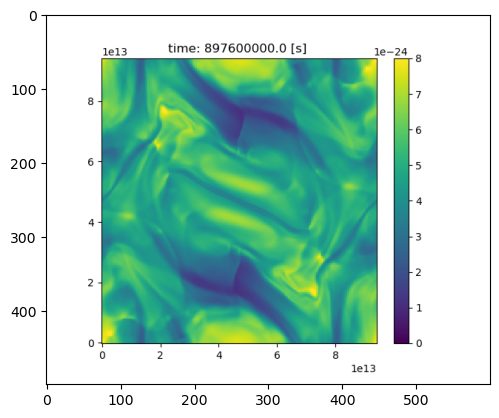

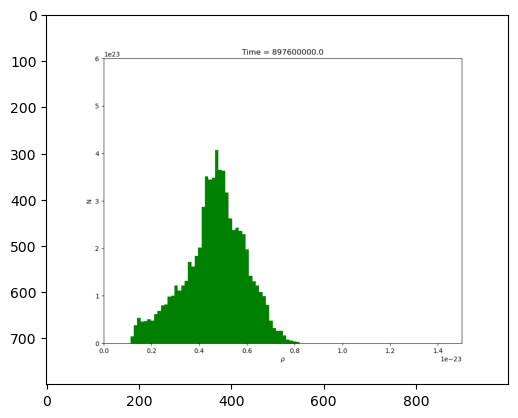

In [81]:
# To see what happens with the simulation, we can read the last histogram and the last map of the density 

map_dens = io.imread(map_directory + "density_plot060.png")

hist_dens = io.imread(hist_directory + "density_field_histogram060.png")

# Plotting 

fig, ax = plt.subplots()

ax.imshow(map_dens, cmap = "viridis")

plt.show()

# Plotting 

fig, ax = plt.subplots()

ax.imshow(hist_dens, cmap = "viridis")

plt.show()

If you check the maps and histograms for the initial times, you will notice thah the density is first equally distributed. Then, after the input of energy, the systems starts to evolve untill the density reaches a normal distribution, as we can see in the histogram. Probably, after the energy transfer, this distribution will become flat untill it reaches a distribution similar to that from the begining.


#### (c) Create a set of Python functions that loops over all the VTK simulation files, computes the following quantities in CGS units for each time:

- the average gas temperature, $\overline T$, (**Hint:** the temperature in each grid cell can be calculated using the equation of state for ideal gases, i.e., $p=\frac{\rho k_BT}{\mu m_u}$, where $k_B$ is the Boltzmann constant, $m_u$ is the atomic mass unit, and $\mu=0.6$ is the mean particle mass in the gas.)

- the average kinetic energy density, $\overline E_k$,

- the average magnetic energy density, $\overline E_m$, and

- the mass-weighted average ($\langle ... \rangle$) velocity dispersion, $\sigma_v = \sqrt{\langle v^2 \rangle - \langle v \rangle^2}$,


and returns:

- a CSV file with 5 columns, time on the first column, and the above quantities in the next ones. The CSV file should be saved into a folder called "output_data".

In [82]:
# Mean temperature

def mean_temp(filename):
    '''
    Function to compute mean temperature 
    Input: filename
    Output: n (average temperature)
    '''
    
    mesh = pv.read(filename)
    
    # Constants
    k_B =  1.3807*10**(-16) # cm^2 g s^-2 K^-1 
    m_u = 1.66053*10**(-24) # g 
    u = 0.6
    
    # Put all the constants together
    cte = u*m_u/k_B
    
    # Get the needed data for the calculation
    rho = pv.get_array(mesh, "rho", preference = 'cell') #density in code units
    prs = pv.get_array(mesh, "prs", preference = "cell") # thermal pressure in code units
    
    # Compute the average temperature 
    n = np.mean((prs*prs_0)*cte/(rho*rho_0 ))
    
    return n

In [83]:
# Define the function 

def quantities(filename):
    """
    Function to read into a vtk file and to compute average 
    kinetic energy density, average magnetic energy density, and average mass-weighted velocity dist.
    Input: filename
    Output:Ek_av, Emf_av, sigma_v
    """
    
    # Opening the mesh
    mesh = pv.read(filename)
    
    # Getting the data arrays
    rho = pv.get_array(mesh, "rho", preference = 'cell') #density in code units
    vx1 = pv.get_array(mesh, "vx1", preference = 'cell') #vx in code units
    vx2 = pv.get_array(mesh, "vx2", preference = 'cell') #vy in code units    
    Bx1 = pv.get_array(mesh, "Bx1", preference = "cell") #Bx in code units 
    Bx2 = pv.get_array(mesh, "Bx2", preference = "cell") #By in code units 
    prs = pv.get_array(mesh, "rho", preference = "cell") # thermal pressure in code units
    
    # Convert the arrays to 2D
    rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx2_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    prs_2D = prs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    
    
    # Convert arrays to CGS units
    rho_cgs2D = np.array(rho_2D * rho_0)
    vx1_cgs2D = np.array(vx1_2D * v_0)
    vx2_cgs2D = np.array(vx2_2D * v_0)
    Bx1_cgs2D = np.array(Bx1_2D * B_0)
    Bx2_cgs2D = np.array(Bx2_2D * B_0)
    prs_cgs2D = np.array(prs_2D * prs_0)
    
    # Once we get the data, we can compute the diferent quantities
    
    # AVERAGE KINETIC ENERGY DENSITY
    
    # compute the modulus of the velocity
    modulus_velocity = np.sqrt(vx1_cgs2D**2 + vx2_cgs2D**2)
    
    # Compute the kinetic energy density and its average 
    E_k2D = (1/2)* rho_cgs2D * modulus_velocity**2 
    
    Ek_av = np.mean(E_k2D)
    
    
    # AVERAGE MAGNETIC ENERGY DENSITY 
    
    # modulus of the magnetic field 
    modulus_mfield = np.sqrt(Bx1_cgs2D**2 + Bx2_cgs2D**2)
    
    # magnetic energy density 
    E_mf2D = (1/2)* (modulus_mfield**2/const.mu_0) * (10e-4) * (1/100**3) * 10**7 
    
    Emf_av = np.mean(E_mf2D)
    
    # MASS WEIGHTED AVERAGE VELOCITY DISPERSION
    
    average_mass_weighted_velocity = np.average(modulus_velocity, weights = rho_cgs2D)
    
    average_mass_weighted_velocity_squared = np.average(modulus_velocity**2, weights = rho_cgs2D)
    
    # Compute the velocity dispersion 
    sigma_v = np.sqrt(average_mass_weighted_velocity_squared - average_mass_weighted_velocity**2)
    
    return Ek_av, Emf_av, sigma_v

In [84]:
# Define empty lists 

T_avg = []
Ek_avg = []
Emf_avg = []
sigma_vel = []


# Let's loop over all the files, and append the results to empty lists 
for i in range(0, len(time_cgs)):
    
    # Setting file name
    filename_3 = directory + "data.0{:03d}.vtk".format(i) 
    
    # Calling average temperature function
    n = mean_temp(filename_3)
    
    # Filling the empty lists with the average temperature 
    T_avg.append(n)
    
    # Calling the second function for the other quantities
    Ek_av, Emf_av, sigma_v= quantities(filename_3)
    
    # Filling the empty lists with the results
    Ek_avg.append(Ek_av)
    Emf_avg.append(Emf_av)
    sigma_vel.append(sigma_v)
    
# As a comment, I tried to compute the average temperature in the same function as the other quantities, but
# for some reason it kept giving me a constant value. If you have an explanation, it would be great to hear it. 
 

In [85]:
#print(T_avg)

In [86]:
# Put the results into a csv file 
# Now, let's create a pandas dataframe with the requested data


new_df3 = pd.DataFrame({'Time [s]': time_cgs,'Average gas temperature [K]': T_avg ,
                        'Average kinetic energy density [J/cm^3]': Ek_avg,
                      'Average magnetic energy density [J/cm^3]':Emf_avg,
                        'Mass weighted average velocity dispersion [cm/s]': sigma_vel})

#print(new_df3)

# Let's put it into a .csv file 

new_df3.to_csv('./new_df3.csv', ",", float_format = '{:.4e}'.format)




#### (d) Create a Python function that reads in the CSV file created in (c) and returns and saves high-quality labeled figures of each of the above-computed quantities versus time, into a folder called "output_analysis". Does the flow reach steady state?


In [87]:
# Read the file 

file_name4 = "new_df3.csv"
df_4 = read_file(file_name4)

# Put the columns into numpy arrays 

time_sec = np.array(df_4["Time [s]"])
Avg_temp = np.array(df_4["Average gas temperature [K]"])
Avg_KE = np.array(df_4["Average kinetic energy density [J/cm^3]"])
Avg_ME = np.array(df_4["Average magnetic energy density [J/cm^3]"])
sigma_vl = np.array(df_4['Mass weighted average velocity dispersion [cm/s]'])

In [88]:
# Create the directory to save the figures
if os.path.isdir("./output_analysis"):
    print("Directory already exists.")
else:
    print("Directory is being created.")
    os.mkdir("./output_analysis")

analysis_directory ="./output_analysis/"

Directory already exists.


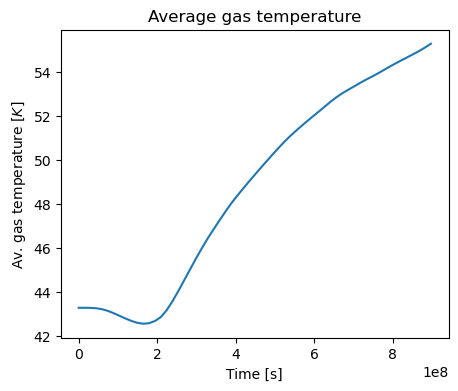

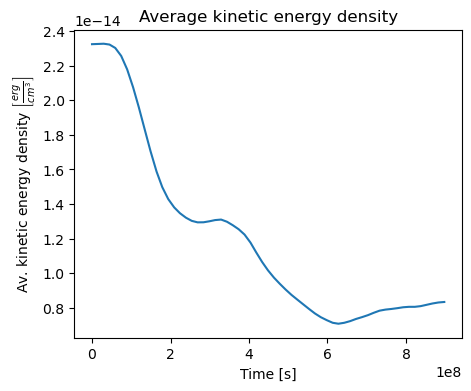

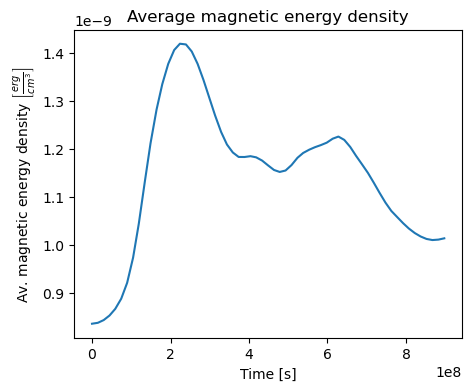

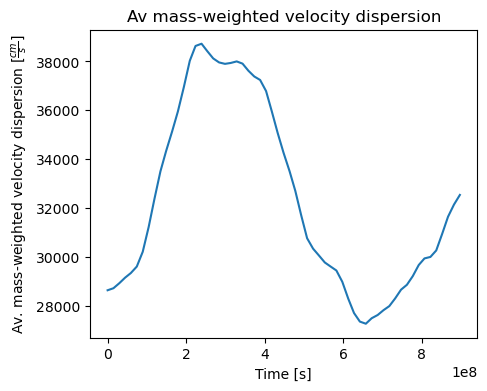

In [89]:
# Plot 

# Average gas temperature 
plt.figure(figsize = (5, 4))

plt.plot(time_sec, Avg_temp)

plt.xlabel("Time [s]")
plt.ylabel(r"Av. gas temperature [$K$]")
plt.title("Average gas temperature") 

plt.savefig(analysis_directory + "Average_gas_temperature.png")
plt.show()
plt.close()

# Average kinetic energy density
plt.figure(figsize = (5, 4))

plt.plot(time_sec, Avg_KE)

plt.xlabel("Time [s]")
plt.ylabel(r"Av. kinetic energy density $\left[\frac{erg}{cm^3} \right]$")
plt.title("Average kinetic energy density")

plt.savefig(analysis_directory + "Average_kinetic_energy_density.png")
plt.show()
plt.close()

# Average magnetic energy density 
plt.figure(figsize = (5, 4)) 

plt.plot(time_sec, Avg_ME)

plt.xlabel("Time [s]")
plt.ylabel(r"Av. magnetic energy density $\left[\frac{erg}{cm^3} \right]$")
plt.title("Average magnetic energy density")


plt.savefig(analysis_directory + "Average_magnetic_energy_density.png")
plt.show()
plt.close()


# Average mass-weighted velocity dispersion 
plt.figure(figsize = (5, 4))

plt.plot(time_sec, sigma_vl)

plt.xlabel("Time [s]")
plt.ylabel(r"Av. mass-weighted velocity dispersion $\left[\frac{cm}{s} \right]$")
plt.title("Av mass-weighted velocity dispersion")

plt.savefig(analysis_directory + "Avg_mass_weighted_velocity_dispersion.png")
plt.show()
plt.close()

Based on the plots for the average kinetic energy density and the average magnetic energy density, I may say that the system reaches an steady state. Remember, before I mentioned that at the end of the simulation, the density reaches a normal distribution, which including this analysis, would indicate that the system is in a almost steady state.  I printed the figures here, but you can find them also in the directory created before.

#### (e) Create a Python function that returns movies showing the time evolution of the kinetic energy density and the magnetic energy density maps computed in (a) and their average values calculated in (c). The movies should be saved into the folder called "output_energies". According to the results, which energy density in dominant?

In [90]:
import glob 
from PIL import Image 

In [101]:
# Create a folder 

if os.path.isdir("./Animation"):
    print("Directory already exists.")
else: 
    print("Directory has been created.")
    os.mkdir("./Animation")

anim_directory = "./Animation/"

Directory already exists.


In [92]:
# Define a new function 

def animation_plot(filename):
    
    # Opening the mesh
    mesh = pv.read(filename)
    
    # Getting the data arrays
    rho = pv.get_array(mesh, "rho", preference = 'cell') #density in code units
    vx1 = pv.get_array(mesh, "vx1", preference = 'cell') #vx in code units
    vx2 = pv.get_array(mesh, "vx2", preference = 'cell') #vy in code units    
    Bx1 = pv.get_array(mesh, "Bx1", preference = "cell") #Bx in code units 
    Bx2 = pv.get_array(mesh, "Bx2", preference = "cell") #By in code units 
    #prs = pv.get_array(mesh, "rho", preference = "cell") # thermal pressure in code units
    
    # Convert the arrays to 2D
    rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx2_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    #prs_2D = prs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    
        
    # Convert arrays to CGS units
    rho_cgs2D = rho_2D * rho_0
    vx1_cgs2D = vx1_2D * v_0
    vx2_cgs2D = vx2_2D * v_0
    Bx1_cgs2D = Bx1_2D * B_0
    Bx2_cgs2D = Bx2_2D * B_0
    #prs_cgs2D = prs_2D * prs_0

    
    # AVERAGE KINETIC ENERGY DENSITY
    
    # compute the modulus of the velocity
    modulus_velocity = np.sqrt(vx1_cgs2D**2 + vx2_cgs2D**2)
    
    # Compute the kinetic energy density and its average 
    E_k2D = (1/2)* rho_cgs2D * modulus_velocity**2 
    Ek_av = np.mean(E_k2D)
    
    
    # AVERAGE MAGNETIC ENERGY DENSITY 
    
    # modulus of the magnetic field 
    modulus_mfield = np.sqrt(Bx1_cgs2D**2 + Bx2_cgs2D**2)
    
    # magnetic energy density 
    E_mf2D = (1/2)* (modulus_mfield**2/const.mu_0) * (10e-4) * (1/100**3) * 10**7
    
    Emf_av = np.mean(E_mf2D)
    
    return vx1_cgs2D, vx2_cgs2D, Bx1_cgs2D, Bx2_cgs2D, rho_cgs2D, Ek_av, Emf_av

In [93]:
# Create empty lists

time_list1 = []
KE_dens = []



# Loop 
for i in range(0,len(time_cgs)):

    filename = directory + "data.0{:03d}.vtk".format(i) 
    
    vx1_cgs2D2, vx2_cgs2D2, Bx1_cgs2D2, Bx2_cgs2D2, rho_cgs2D2, Ek_av2, Emf_av2 = animation_plot(filename)
    
    
    
    # Get times 
    times_i = time_cgs[i]
    
    time_list1.append(times_i)
    
    # KE density
    
    KE_dens.append(Ek_av2)

    # KINETIC ENERGY DENSITY PLOTS
    
    # compute the modulus of the velocity
    modulus_velocity2 = np.sqrt(vx1_cgs2D2**2 + vx2_cgs2D2**2)
    
    # Compute the kinetic energy density
    E_k2D2 = (1/2)* rho_cgs2D2 * modulus_velocity2**2 
    
    # Create your first figure
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first figure with a color bar
    z1 = ax[0].pcolor(x_2D, y_2D, E_k2D2, cmap = "viridis", vmin = 0, vmax = 1e-13)
    cb1 = plt.colorbar(z1, ax=ax[0])
    cb1.set_label('Av. KE density')

    # Plot the second figure
    ax[1].plot(time_list1, KE_dens)

    # Add titles and labels for the subplots
    ax[0].set_title('kinetic energy density map')
    #ax[0].set_xlabel('X1')
    #ax[0].set_ylabel('Y1')

    ax[1].set_title("Average kinetic energy density")
    ax[1].set_xlabel('Time [s]')
    ax[1].set_ylabel(r"Av. kinetic energy density $\left[\frac{erg}{cm^3} \right]$")
    
    ax[1].set_xlim(0, np.max(time_cgs))
    ax[1].set_ylim(0, 2.5e-14)

    fig.suptitle(f'Time: {time_cgs[i]}')
    # Adjust the spacing between subplots
    plt.tight_layout()

    plt.savefig(anim_directory + "Kinetic_energy_density{:03d}.png".format(i))
    plt.close()


    

In [94]:
# Create empty lists

time_list2 = []
ME_dens = []

# Loop 
for i in range(0,len(time_cgs)):

    filename = directory + "data.0{:03d}.vtk".format(i) 
    
    vx1_cgs2D2, vx2_cgs2D2, Bx1_cgs2D2, Bx2_cgs2D2, rho_cgs2D2, Ek_av2, Emf_av2 = animation_plot(filename)
    
    
    # Get times 
    times_j = time_cgs[i]
    
    time_list2.append(times_j)
    
    # ME density 
    
    ME_dens.append(Emf_av2)
    
    # MAGNETIC ENERGY DENSITY 
    
    # modulus of the magnetic field 
    modulus_mfield2 = np.sqrt(Bx1_cgs2D2**2 + Bx2_cgs2D2**2)
    
    # magnetic energy density 
    E_mf2D2 = (1/2)* (modulus_mfield2**2 * 10e-4 /(4*np.pi*10e-7)) * (1/100**3) * 10**7     # 10e-4 to pass from gauss to tesla 
    
    # Create your first figure
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first figure with a color bar
    z1 = ax[0].pcolor(x_2D, y_2D, E_mf2D2, cmap = "magma", vmin = 0, vmax = 0.5e-9)
    cb1 = plt.colorbar(z1, ax=ax[0])
    cb1.set_label('Av. ME density')

    # Plot the second figure
    ax[1].plot(time_list2, ME_dens)

    # Add titles and labels for the subplots
    ax[0].set_title('Magnetic energy density map')
    #ax[0].set_xlabel('X1')
    #ax[0].set_ylabel('Y1')

    ax[1].set_title("Av. magnetic energy density")
    ax[1].set_xlabel('Time [s]')
    ax[1].set_ylabel(r"Av. magnetic energy density $\left[\frac{erg}{cm^3} \right]$")

    ax[1].set_xlim(0, np.max(time_cgs))
    ax[1].set_ylim(0.8e-9, 1.5e-9)
    
    fig.suptitle(f'Time: {time_cgs[i]}')
    # Adjust the spacing between subplots
    plt.tight_layout()

    plt.savefig(anim_directory + "Magnetic_energy_density{:03d}.png".format(i))
    plt.close()


In [95]:
# Create a folder 

if os.path.isdir("./output_energies"):
    print("Directory already exists.")
else: 
    print("Directory has been created.")
    os.mkdir("./output_energies")

animations = "./output_energies/"

Directory already exists.


In [96]:
# Show the animations 
import os 
import glob 
from IPython import display
from PIL import Image 

In [97]:
# Animation: Kinetic energy density

images_input = "./Animation/Kinetic_energy_density***.png"
imgif_output = animations + "Kinetic_energy_density.gif"

# Collect the images 
imgs = (Image.open(f) for f in sorted(glob.glob(images_input)))

img = next(imgs)

img.save(fp = imgif_output, format = "GIF", append_images = imgs,\
         save_all = True, duration = 60, loop = 0)

In [98]:
# Animation: Magnetic energy density

images_input = "./Animation/Magnetic_energy_density***.png"
imgif_output = animations + "Magnetic_energy_density.gif"

# Collect the images 
imgs = (Image.open(f) for f in sorted(glob.glob(images_input)))

img = next(imgs)

img.save(fp = imgif_output, format = "GIF", append_images = imgs,\
         save_all = True, duration = 60, loop = 0)

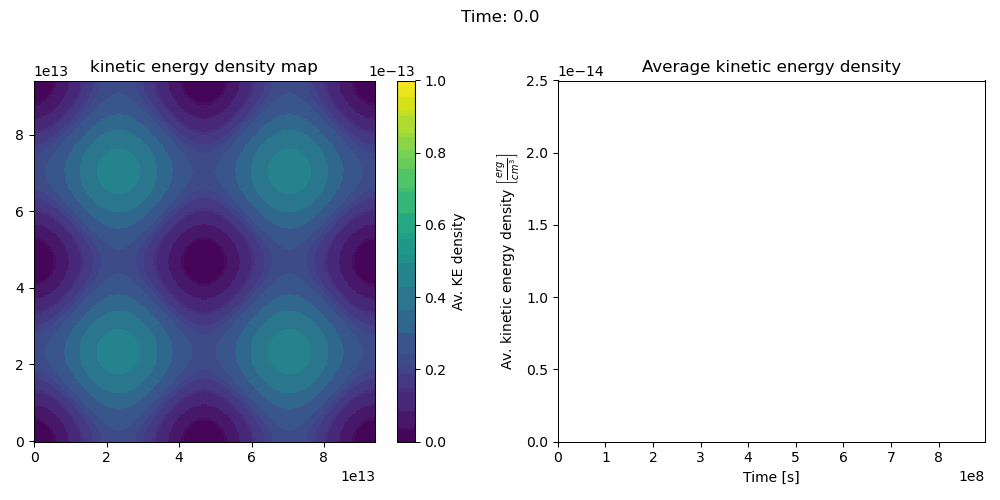

In [99]:


# Show the animation
display.Image("./output_energies/Kinetic_energy_density.gif")


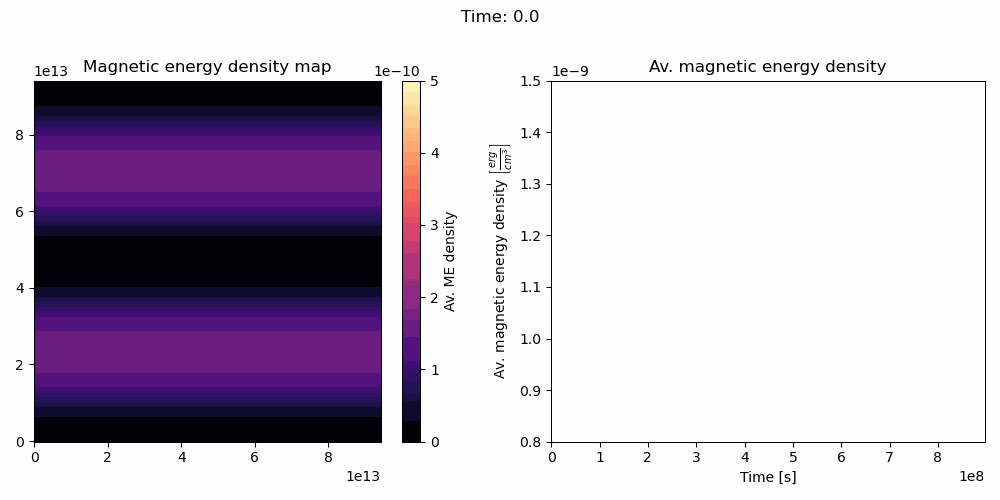

In [100]:
display.Image("./output_energies/Magnetic_energy_density.gif")

According to the plots and animations, and taking into account the scale of the plots, I would say that the dominant energy density is the magnetic energy density.